In [1]:
from google.colab import files
uploaded = files.upload()

Saving data-nonlinear.txt to data-nonlinear.txt


In [0]:
import numpy as np 
from matplotlib import pyplot as plt 
import csv
import copy
import math
from sympy import * 
init_printing(use_latex='mathjax')

from IPython.display import display

#compute z
def compute_z (theta, data):
  z = np.dot(data,np.transpose(theta))
  return z


#compute prediction
def compute_prediction (theta,data):
  z=[]
  for i in range(len(data)):
    z.append(compute_z(theta,data[i]))
  prediction = []
  for i in range(len(z)):
    prediction.append(1.0/(1+np.exp(-z[i])))

  return prediction


# Objective Function
def compute_cost(theta, data, l, ld):
  m = float(len(l))
  prediction = compute_prediction(theta, data)
  prediction=np.array(prediction)
  l=np.array(l)
  
  J = (1/m)*(np.sum(-l*np.log(prediction)-(1-l)*np.log(1-prediction))) + (ld/2)*(np.sum(theta**2))
  
  return J

# get theta, theta_history, J_history, accuracy_history
def compute_theta(theta, data, l, alpha, num, ld):
  m = float(len(data))
  J_history=[]
  theta_history=[]
  accuracy_history=[]
  J_history.append(compute_cost(theta,data, l, ld))
  theta_history.append(copy.deepcopy(theta))
  data_t = copy.deepcopy(np.array(data))
  data_t = np.transpose(data_t)
  data_t = data_t.tolist()
  temp = 0 
  pd = compute_prediction(theta,data)
  for i in range(len(pd)):
    if pd[i] >= 0.5:
      if l[i]==1:
        temp += 1
    else:
      if l[i]==0:
        temp += 1
  accuracy_history.append(copy.deepcopy(temp))


 
  for i in range(num):
    prediction = compute_prediction(theta,data)
    prediction = np.array(prediction)
    l = np.array(l)
    loss = prediction - l


    t = np.zeros(100)

    for i in range(len(t)):
      t[i] = -alpha*(1/m)*np.sum(loss*data_t[i]) - ld*theta[i] 
    
    for i in range(len(t)):
      theta[i] += t[i]
    

    temp = 0 
    for j in range(len(prediction)):
      if prediction[j] >= 0.5:
        if l[j]==1:
          temp += 1
      else:
        if l[j]==0:
          temp += 1
    accuracy_history.append(copy.deepcopy(temp))
    J_history.append(compute_cost(theta, data, l, ld))
    theta_history.append(copy.deepcopy(theta))
    theta_r = copy.deepcopy(theta)

  return theta_r, theta_history, J_history ,accuracy_history



data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]



train_data=[]
data_label=[]
temp=[]

for i in range(len(pointX)):
  for j in range(10):
    for k in range(10):
      temp.append(pointX[i]**j*pointY[i]**k)
  data_label.append(copy.deepcopy(label[i]))
  temp[0] = 1
  train_data.append(copy.deepcopy(temp))
  temp.clear()



tt=np.zeros(100)
alpha = 0.01
num = 100000
ld = [0.003, 0.0001, 0.000001]


tt0, theta_h0, cost_h0, accuracy_h0 = compute_theta(tt, train_data, data_label, alpha, num, ld[0])
tt1, theta_h1, cost_h1, accuracy_h1 = compute_theta(tt, train_data, data_label, alpha, num, ld[1])
tt2, theta_h2, cost_h2, accuracy_h2 = compute_theta(tt, train_data, data_label, alpha, num, ld[2])


accuracy_rate0=[]
accuracy_rate1=[]
accuracy_rate2=[]
for i in range(len(accuracy_h0)):
  accuracy_rate0.append(copy.deepcopy(accuracy_h0[i]/len(train_data)))
  accuracy_rate1.append(copy.deepcopy(accuracy_h1[i]/len(train_data)))
  accuracy_rate2.append(copy.deepcopy(accuracy_h2[i]/len(train_data)))



#1. Plot the data

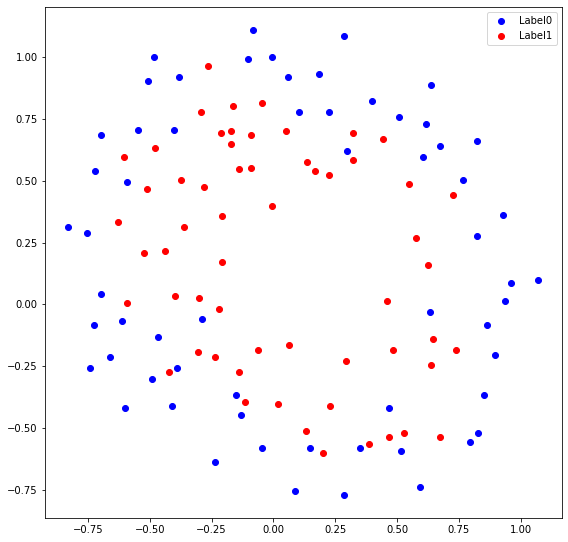

In [185]:
#plot the data

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b', label = "Label0")
plt.scatter(pointX1, pointY1, c='r', label = "Label1")
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()

#2. Plot the training error

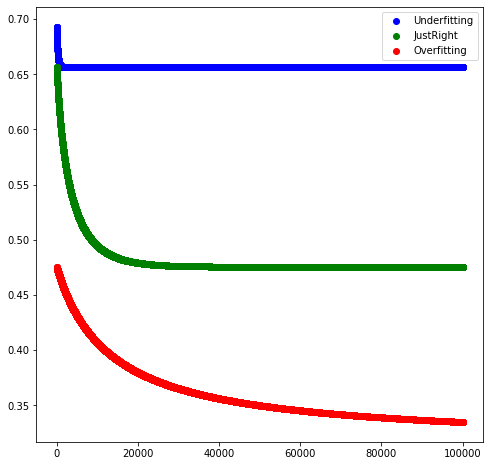

In [186]:
#Plot the training error

plt.figure(figsize=(8, 8))
plt.scatter(range(num+1), cost_h0, c='blue', label = "Underfitting")
plt.scatter(range(num+1), cost_h1, c='green', label = "JustRight")
plt.scatter(range(num+1), cost_h2, c='red',  label = "Overfitting")
plt.legend(loc='upper right')
plt.show()


#3. Display the values of the chosen regularization parameters

In [187]:
#Display the values of the chosen regularization parameters
print('\033[31m'+(str)(ld[2])+'\033[0m')
print('\033[32m'+(str)(ld[1])+'\033[0m')
print('\033[34m'+(str)(ld[0])+'\033[0m')

1e-06
0.0001
0.003


#4. Plot the training accuracy

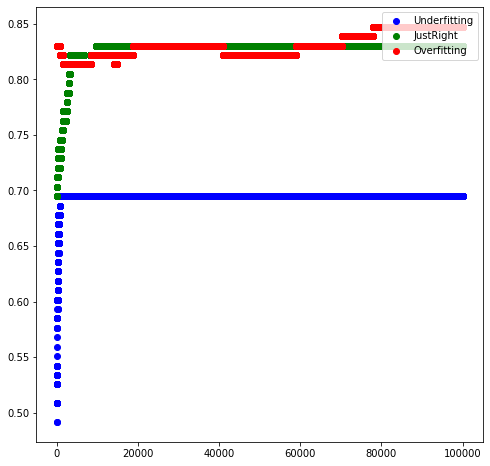

In [188]:
#Plot the training accuracy

plt.figure(figsize=(8, 8))
plt.scatter(range(num+1), accuracy_rate0, c='blue', label = "Underfitting")
plt.scatter(range(num+1), accuracy_rate1, c='green', label = "JustRight")
plt.scatter(range(num+1), accuracy_rate2, c='red', label = "Overfitting")
plt.legend(loc='upper right')
plt.show()

#5. Final training accuracy

In [189]:
#Write down the final training accuracy
print('\033[31m'+(str)(accuracy_rate2[num]*100)+'\033[0m')
print('\033[32m'+(str)(accuracy_rate1[num]*100)+'\033[0m')
print('\033[34m'+(str)(accuracy_rate0[num]*100)+'\033[0m')

84.7457627118644
83.05084745762711
69.49152542372882


#6. Plot the optimal classifier with varying regularization parameters superimposed on the training data

In [0]:
plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.gca().set_aspect('equal', adjustable='box')

xla = np.linspace(-1.0,+1.0,1000)
yla = np.linspace(-1.0,+1.0,1000)
X,Y = np.meshgrid(xla,yla)
tt=copy.deepcopy(tt0)
eqn0 = tt[0]+tt[1]*Y+tt[2]*Y**2+tt[3]*Y**3+tt[4]*Y**4+tt[5]*Y**5+tt[6]*Y**6+tt[7]*Y**7+tt[8]*Y**8+tt[9]*Y**9+tt[10]*X+tt[11]*X*Y+tt[12]*X*Y**2+tt[13]*X*Y**3+tt[14]*X*Y**4+tt[15]*X*Y**5+tt[16]*X*Y**6+tt[17]*X*Y**7+tt[18]*X*Y**8+tt[19]*X*Y**9+tt[20]*X**2+tt[21]*X**2*Y+tt[22]*X**2*Y**2+tt[23]*X**2*Y**3+tt[24]*X**2*Y**4+tt[25]*X**2*Y**5+tt[26]*X**2*Y**6+tt[27]*X**2*Y**7+tt[28]*X**2*Y**8+tt[29]*X**2*Y**9+tt[30]*X**3+tt[31]*X**3*Y+tt[32]*X**3*Y**2+tt[33]*X**3*Y**3+tt[34]*X**3*Y**4+tt[35]*X**3*Y**5+tt[36]*X**3*Y**6+tt[37]*X**3*Y**7+tt[38]*X**3*Y**8+tt[39]*X**3*Y**9+tt[40]*X**4+tt[41]*X**4*Y+tt[42]*X**4*Y**2+tt[43]*X**4*Y**3+tt[44]*X**4*Y**4+tt[45]*X**4*Y**5+tt[46]*X**4*Y**6+tt[47]*X**4*Y**7+tt[48]*X**4*Y**8+tt[49]*X**4*Y**9+tt[50]*X**5+tt[51]*X**5*Y+tt[52]*X**5*Y**2+tt[53]*X**5*Y**3+tt[54]*X**5*Y**4+tt[55]*X**5*Y**5+tt[56]*X**5*Y**6+tt[57]*X**5*Y**7+tt[58]*X**5*Y**8+tt[59]*X**5*Y**9+tt[60]*X**6+tt[61]*X**6*Y+tt[62]*X**6*Y**2+tt[63]*X**6*Y**3+tt[64]*X**6*Y**4+tt[65]*X**6*Y**5+tt[66]*X**6*Y**6+tt[67]*X**6*Y**7+tt[68]*X**6*Y**8+tt[69]*X**6*Y**9+tt[70]*X**7+tt[71]*X**7*Y+tt[72]*X**7*Y**2+tt[73]*X**7*Y**3+tt[74]*X**7*Y**4+tt[75]*X**7*Y**5+tt[76]*X**7*Y**6+tt[77]*X**7*Y**7+tt[78]*X**7*Y**8+tt[79]*X**7*Y**9+tt[80]*X**8+tt[81]*X**8*Y+tt[82]*X**8*Y**2+tt[83]*X**8*Y**3+tt[84]*X**8*Y**4+tt[85]*X**8*Y**5+tt[86]*X**8*Y**6+tt[87]*X**8*Y**7+tt[88]*X**8*Y**8+tt[89]*X**8*Y**9+tt[90]*X**9+tt[91]*X**9*Y+tt[92]*X**9*Y**2+tt[93]*X**9*Y**3+tt[94]*X**9*Y**4+tt[95]*X**9*Y**5+tt[96]*X**9*Y**6+tt[97]*X**9*Y**7+tt[98]*X**9*Y**8+tt[99]*X**9*Y**9
tt=copy.deepcopy(tt1)
eqn1 = tt[0]+tt[1]*Y+tt[2]*Y**2+tt[3]*Y**3+tt[4]*Y**4+tt[5]*Y**5+tt[6]*Y**6+tt[7]*Y**7+tt[8]*Y**8+tt[9]*Y**9+tt[10]*X+tt[11]*X*Y+tt[12]*X*Y**2+tt[13]*X*Y**3+tt[14]*X*Y**4+tt[15]*X*Y**5+tt[16]*X*Y**6+tt[17]*X*Y**7+tt[18]*X*Y**8+tt[19]*X*Y**9+tt[20]*X**2+tt[21]*X**2*Y+tt[22]*X**2*Y**2+tt[23]*X**2*Y**3+tt[24]*X**2*Y**4+tt[25]*X**2*Y**5+tt[26]*X**2*Y**6+tt[27]*X**2*Y**7+tt[28]*X**2*Y**8+tt[29]*X**2*Y**9+tt[30]*X**3+tt[31]*X**3*Y+tt[32]*X**3*Y**2+tt[33]*X**3*Y**3+tt[34]*X**3*Y**4+tt[35]*X**3*Y**5+tt[36]*X**3*Y**6+tt[37]*X**3*Y**7+tt[38]*X**3*Y**8+tt[39]*X**3*Y**9+tt[40]*X**4+tt[41]*X**4*Y+tt[42]*X**4*Y**2+tt[43]*X**4*Y**3+tt[44]*X**4*Y**4+tt[45]*X**4*Y**5+tt[46]*X**4*Y**6+tt[47]*X**4*Y**7+tt[48]*X**4*Y**8+tt[49]*X**4*Y**9+tt[50]*X**5+tt[51]*X**5*Y+tt[52]*X**5*Y**2+tt[53]*X**5*Y**3+tt[54]*X**5*Y**4+tt[55]*X**5*Y**5+tt[56]*X**5*Y**6+tt[57]*X**5*Y**7+tt[58]*X**5*Y**8+tt[59]*X**5*Y**9+tt[60]*X**6+tt[61]*X**6*Y+tt[62]*X**6*Y**2+tt[63]*X**6*Y**3+tt[64]*X**6*Y**4+tt[65]*X**6*Y**5+tt[66]*X**6*Y**6+tt[67]*X**6*Y**7+tt[68]*X**6*Y**8+tt[69]*X**6*Y**9+tt[70]*X**7+tt[71]*X**7*Y+tt[72]*X**7*Y**2+tt[73]*X**7*Y**3+tt[74]*X**7*Y**4+tt[75]*X**7*Y**5+tt[76]*X**7*Y**6+tt[77]*X**7*Y**7+tt[78]*X**7*Y**8+tt[79]*X**7*Y**9+tt[80]*X**8+tt[81]*X**8*Y+tt[82]*X**8*Y**2+tt[83]*X**8*Y**3+tt[84]*X**8*Y**4+tt[85]*X**8*Y**5+tt[86]*X**8*Y**6+tt[87]*X**8*Y**7+tt[88]*X**8*Y**8+tt[89]*X**8*Y**9+tt[90]*X**9+tt[91]*X**9*Y+tt[92]*X**9*Y**2+tt[93]*X**9*Y**3+tt[94]*X**9*Y**4+tt[95]*X**9*Y**5+tt[96]*X**9*Y**6+tt[97]*X**9*Y**7+tt[98]*X**9*Y**8+tt[99]*X**9*Y**9
tt=copy.deepcopy(tt2)
eqn2 = tt[0]+tt[1]*Y+tt[2]*Y**2+tt[3]*Y**3+tt[4]*Y**4+tt[5]*Y**5+tt[6]*Y**6+tt[7]*Y**7+tt[8]*Y**8+tt[9]*Y**9+tt[10]*X+tt[11]*X*Y+tt[12]*X*Y**2+tt[13]*X*Y**3+tt[14]*X*Y**4+tt[15]*X*Y**5+tt[16]*X*Y**6+tt[17]*X*Y**7+tt[18]*X*Y**8+tt[19]*X*Y**9+tt[20]*X**2+tt[21]*X**2*Y+tt[22]*X**2*Y**2+tt[23]*X**2*Y**3+tt[24]*X**2*Y**4+tt[25]*X**2*Y**5+tt[26]*X**2*Y**6+tt[27]*X**2*Y**7+tt[28]*X**2*Y**8+tt[29]*X**2*Y**9+tt[30]*X**3+tt[31]*X**3*Y+tt[32]*X**3*Y**2+tt[33]*X**3*Y**3+tt[34]*X**3*Y**4+tt[35]*X**3*Y**5+tt[36]*X**3*Y**6+tt[37]*X**3*Y**7+tt[38]*X**3*Y**8+tt[39]*X**3*Y**9+tt[40]*X**4+tt[41]*X**4*Y+tt[42]*X**4*Y**2+tt[43]*X**4*Y**3+tt[44]*X**4*Y**4+tt[45]*X**4*Y**5+tt[46]*X**4*Y**6+tt[47]*X**4*Y**7+tt[48]*X**4*Y**8+tt[49]*X**4*Y**9+tt[50]*X**5+tt[51]*X**5*Y+tt[52]*X**5*Y**2+tt[53]*X**5*Y**3+tt[54]*X**5*Y**4+tt[55]*X**5*Y**5+tt[56]*X**5*Y**6+tt[57]*X**5*Y**7+tt[58]*X**5*Y**8+tt[59]*X**5*Y**9+tt[60]*X**6+tt[61]*X**6*Y+tt[62]*X**6*Y**2+tt[63]*X**6*Y**3+tt[64]*X**6*Y**4+tt[65]*X**6*Y**5+tt[66]*X**6*Y**6+tt[67]*X**6*Y**7+tt[68]*X**6*Y**8+tt[69]*X**6*Y**9+tt[70]*X**7+tt[71]*X**7*Y+tt[72]*X**7*Y**2+tt[73]*X**7*Y**3+tt[74]*X**7*Y**4+tt[75]*X**7*Y**5+tt[76]*X**7*Y**6+tt[77]*X**7*Y**7+tt[78]*X**7*Y**8+tt[79]*X**7*Y**9+tt[80]*X**8+tt[81]*X**8*Y+tt[82]*X**8*Y**2+tt[83]*X**8*Y**3+tt[84]*X**8*Y**4+tt[85]*X**8*Y**5+tt[86]*X**8*Y**6+tt[87]*X**8*Y**7+tt[88]*X**8*Y**8+tt[89]*X**8*Y**9+tt[90]*X**9+tt[91]*X**9*Y+tt[92]*X**9*Y**2+tt[93]*X**9*Y**3+tt[94]*X**9*Y**4+tt[95]*X**9*Y**5+tt[96]*X**9*Y**6+tt[97]*X**9*Y**7+tt[98]*X**9*Y**8+tt[99]*X**9*Y**9
Z = 0
plt.contour(X,Y,eqn0,[Z], colors='blue', labels = "Underfitting")
plt.contour(X,Y,eqn1,[Z], colors='green', labels = "JustRight")
plt.contour(X,Y,eqn2,[Z], colors='red', labels = "Overfitting")
plt.legend(loc='upper right')
plt.show()
